#Monitoria 06: Artificial Immune Systems

Autores: Hugo Amorim - 2020.3 (haan2@ecomp.poli.br), Ana Catarina Fonseca - 2020.1

Duvidas: acgfp@ecomp.poli.br

Este documento foi criado para a disciplina de Inteligencia Artificial do curso de Engenharia da Computação da UPE, ministrada pelo Prof. Fernando Buarque. 

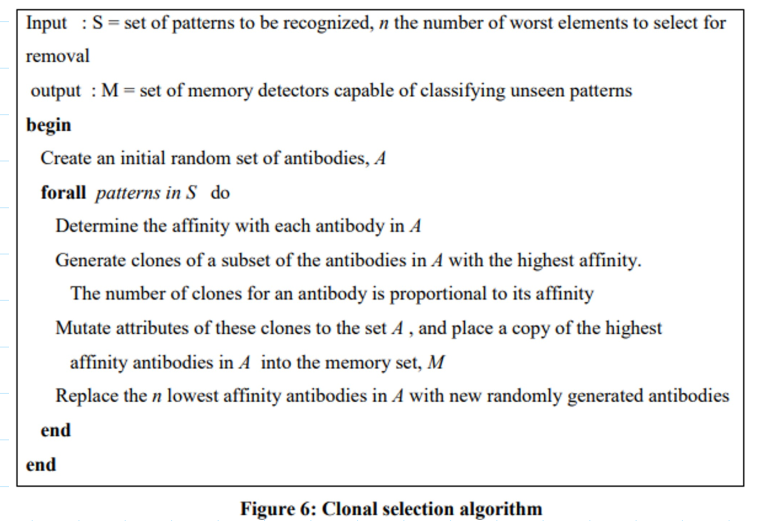

Existem diversos algoritmos que pertencem ao grupo de Sistemas Imunológicos Artificiais, aqui demonstramos um deles: 

**<h4>Clonal Selection Algorithm (CLONALG)</h4>**

**Passo a passo:**

1. Gerar população inicial

2. Calcular fitness da população

3. Ordenar do menor(melhor fitness) para o maior

4. Realizar clonagem

5. Realizar mutação

6. Realizar seleção

7. Gerar novos indivíduos aleatórios

8. Realizar seleção

9. Voltar ao passo 2 enquanto não atingir critério de parada



**O problema!**

Função esfera - 
Grupo de funções já conhecidas que são utilizadas para comparação de algoritmos (benchmark functions). São importantes para testes e validação!

http://benchmarkfcns.xyz/fcns


In [ ]:
%%latex

f(\textbf{x}) = f(x_1, x_2, ..., x_n) = {\sum_{i=1}^{n} x_i^{2}}.

<IPython.core.display.Latex object>

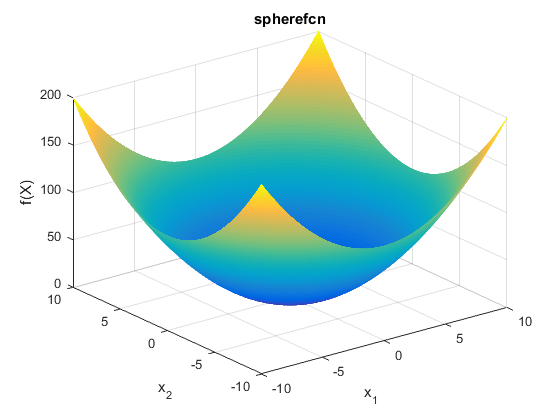

In [ ]:
# ----- Problema: Esfera -----

def fitness_esfera(possivel_solucao):
  fit = 0
  for i in range(len(possivel_solucao)):
    fit += possivel_solucao[i]**2
  return fit

In [ ]:
# ----- Imports -----
import random
import math
from tqdm import tqdm #barra de progresso :)
import sys


# Biblioteca para geração de graficos para facilitar visualização
import matplotlib.pyplot as plt

In [ ]:
# Mostra a mudanca do melhor fitness pelas iteracoes
def gerar_grafico_desempenho_tempo(fitness):
  x = []
  y = []
  for i in range(len(fitness)):
    x.append(i)
    y.append(fitness[i])

  plt.plot(x, y)
  plt.title('Desempenho X Tempo')
  plt.show()

In [ ]:
# ----- Inicialização ----


# Parâmetros
NUMERO_INDIVIDUOS = 80
ITERACOES = 100
FATOR_CLONAGEM = 0.5
TAXA_MUTACAO = 0.4
NUMERO_SELECAO = int(NUMERO_INDIVIDUOS/4)
NOVOS_INDIVIDUOS = int(NUMERO_INDIVIDUOS/4)

# Espaço de busca no contexto da função esfera quer dizer que os valores das possíveis soluções estão restritos ao intervalo determinado.
# Ou seja, para cada dimensão, o valor inicial aleatório gerado deve estar dentro deste intervalo, e todas as alterações (mutações, por exemplo)
# Devem estar de acordo com essa restrição.
ESPACO_DE_BUSCA = [-5.12, 5.12]
DIMENSOES = 5


def inicializar_populacao():
  populacao = []
  for i in range(NUMERO_INDIVIDUOS):
    ind = []
    for j in range(DIMENSOES):
      ind.append(random.random()*(ESPACO_DE_BUSCA[1]-ESPACO_DE_BUSCA[0]) - ESPACO_DE_BUSCA[1])
    populacao.append(ind)
  return populacao

def calcular_fitness_populacao(populacao):
  fitness = []
  for index, i in enumerate(populacao):
    fitness.append([fitness_esfera(i), index])
  return fitness

In [ ]:
# ----- CLONALG -----

def ordenar_fitness(lista_fitness):
  lista_ordenada = []
  for i in lista_fitness:
    if len(lista_ordenada) == 0:
      lista_ordenada.append(i)
    else:
      for index, j in enumerate(lista_ordenada):
        if i[0] < j[0]:
          lista_ordenada.insert(index, i)
          break
      else:
        lista_ordenada.append(i)
  return lista_ordenada

def clonagem(individuo):
    numero_de_clones = math.ceil(FATOR_CLONAGEM * NUMERO_INDIVIDUOS / individuo[0])
    clones = []
    for i in range(numero_de_clones):
      clones.append(individuo)    
    return clones

def mutacao(individuo, populacao):
  probabilidade = random.random()
  if probabilidade < (individuo[0] / (TAXA_MUTACAO*100)):
    individuo_mutado = []
    for dimensao in populacao[individuo[1]]:
      probabilidade = random.random()
      if probabilidade < (individuo[0] / (TAXA_MUTACAO*100)):
        nova_posicao = random.random()*(ESPACO_DE_BUSCA[1]-ESPACO_DE_BUSCA[0]) - ESPACO_DE_BUSCA[1]
        individuo_mutado.append( nova_posicao )
      else:
        individuo_mutado.append(dimensao)
                
    return individuo_mutado
  else:
    return populacao[individuo[1]]

def selecao(populacao_inicial, populacao_clonada):
  nova_populacao = populacao_inicial + populacao_clonada
  novos_fitness = calcular_fitness_populacao(nova_populacao)
  novos_fitness = ordenar_fitness(novos_fitness)

  populacao = []
  for i in range(NUMERO_INDIVIDUOS):
    populacao.append(nova_populacao[novos_fitness[i][1]])
  
  return populacao

def gerar_novos_individuos(quantidade):
  populacao = []
  for i in range(quantidade):
    ind = []
    for j in range(DIMENSOES):
      ind.append(random.random()*(ESPACO_DE_BUSCA[1]-ESPACO_DE_BUSCA[0]) - ESPACO_DE_BUSCA[1])
    populacao.append(ind)
  return populacao


100%|██████████| 100/100 [00:31<00:00,  3.22it/s]


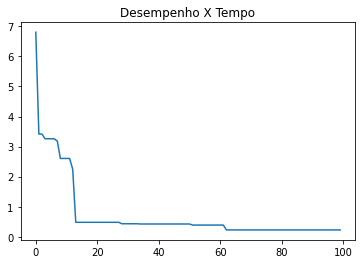

O melhor fitness encontrado 0.2280492294036649 e o melhor indivíduo no final: [0.1678628771839623, 0.20421061381568872, -0.2278170835096418, 0.09452511577264655, -0.3119834739558094] 


In [ ]:
# ----- Executanto o algoritmo -----
populacao = inicializar_populacao()
best_fitness = sys.maxsize
fitness_over_time = []
best_individual = populacao[0]

for iteracao in tqdm(range(ITERACOES)):
  # Calcula o fitness
  fitness = calcular_fitness_populacao(populacao)

  # Ordena do melhor (menor!) para o pior
  fitness_ordenado = ordenar_fitness(fitness)

  # Seleciona os que serão clonados
  individuos_clonaveis = fitness_ordenado[0:NUMERO_SELECAO]

  # Gera os individuos clonados
  individuos_clonados = []
  for i in individuos_clonaveis:
    individuos_clonados += clonagem(i)

  # Realiza a hipermutação
  individuos_mutados = []
  for i in individuos_clonados:
    individuos_mutados.append(mutacao(i, populacao))

  # Fazer seleção
  individuos_selecionados = selecao(populacao, individuos_mutados)

  # Gerar uma nova populacao aleatoria
  novos_individuos_aleatorios = gerar_novos_individuos(NOVOS_INDIVIDUOS)

  # Fazer seleção entre os novos individuos aleatorios e a população
  populacao = selecao(individuos_selecionados, novos_individuos_aleatorios)

  best_fit_iteration = fitness_esfera(populacao[0])
  if best_fit_iteration < best_fitness:
    best_fitness = best_fit_iteration
    best_individual = populacao[0]
  fitness_over_time.append(best_fit_iteration)


gerar_grafico_desempenho_tempo(fitness_over_time)
print(f'O melhor fitness encontrado {best_fitness} e o melhor indivíduo no final: {best_individual} ')